In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("Resources", "testing.csv"))
df.head()

,Year,GCAG,GISTEMP,Average Land Temperature (Degrees Celcius),c-C4F8,C2F6,C3F8,C4F10,C5F12,C6F14,...,HFC245fa,HFC365mfc,HFC4310mee,CH4,CH3Br,CH3Cl,NF3,N20,SF6,SO2F2
0,1880,-0.1148,-0.20,8.118750,0.0,0.000349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,868.696106,5.299998,457.0,0.0,277.265047,0.0,0.000028
1,1881,-0.0628,-0.12,8.270917,0.0,0.000363,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,870.984127,5.299998,457.0,0.0,277.374049,0.0,0.000029
2,1882,-0.0648,-0.10,8.128917,0.0,0.000377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,873.250134,5.299998,457.0,0.0,277.486048,0.0,0.000029
3,1883,-0.1424,-0.21,7.976917,0.0,0.000392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,875.603151,5.299998,457.0,0.0,277.591048,0.0,0.000029
4,1884,-0.2009,-0.28,7.773667,0.0,0.000407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,878.148195,5.299998,457.0,0.0,277.695048,0.0,0.000029


In [3]:
target = df["GCAG"]

In [4]:
clean_data = df.drop(["Average Land Temperature (Degrees Celcius)", "GISTEMP", "GCAG", "Year"], axis=1)
feature_names = clean_data.columns
clean_data.head()

,c-C4F8,C2F6,C3F8,C4F10,C5F12,C6F14,C7F16,C8F18,CO2,CCl4,...,HFC245fa,HFC365mfc,HFC4310mee,CH4,CH3Br,CH3Cl,NF3,N20,SF6,SO2F2
0,0.0,0.000349,0.0,0.0,0.0,0.0,0.0,0.0,289.469999,0.025,...,0.0,0.0,0.0,868.696106,5.299998,457.0,0.0,277.265047,0.0,0.000028
1,0.0,0.000363,0.0,0.0,0.0,0.0,0.0,0.0,289.736999,0.025,...,0.0,0.0,0.0,870.984127,5.299998,457.0,0.0,277.374049,0.0,0.000029
2,0.0,0.000377,0.0,0.0,0.0,0.0,0.0,0.0,290.018999,0.025,...,0.0,0.0,0.0,873.250134,5.299998,457.0,0.0,277.486048,0.0,0.000029
3,0.0,0.000392,0.0,0.0,0.0,0.0,0.0,0.0,290.262999,0.025,...,0.0,0.0,0.0,875.603151,5.299998,457.0,0.0,277.591048,0.0,0.000029
4,0.0,0.000407,0.0,0.0,0.0,0.0,0.0,0.0,290.511999,0.025,...,0.0,0.0,0.0,878.148195,5.299998,457.0,0.0,277.695048,0.0,0.000029


In [5]:
# Convert to numpy arrays
import numpy as np

features = np.array(clean_data)
target_final = np.array(target)

# Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_final, random_state = 42)

In [6]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8148961546074528

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.893883963393516

In [8]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [9]:
new_df = pd.DataFrame(results)

In [10]:
new_df.to_csv('resultsGCAG.csv', index=False) 

In [11]:
results

[(0.12819095438964748, 'Halon1211'),
 (0.061296116630495626, 'HFC23'),
 (0.0436361382702106, 'HFC236fa'),
 (0.03663643858174055, 'CO2'),
 (0.034367362008785984, 'HCFC22'),
 (0.03322087139828337, 'CH2Cl2'),
 (0.032137817781924344, 'HFC227ea'),
 (0.03197711061412044, 'N20'),
 (0.031949406423080126, 'CF4'),
 (0.031185875087510202, 'CH4'),
 (0.030965154996416704, 'C2F6'),
 (0.030947055372186685, 'HFC32'),
 (0.03053217823414531, 'C3F8'),
 (0.030468873436998365, 'SO2F2'),
 (0.028310858625123506, 'CFC113'),
 (0.0235654707785025, 'NF3'),
 (0.023021406415234584, 'Halon2402'),
 (0.02192469005078121, 'CFC115'),
 (0.020563518252179287, 'CHCl3'),
 (0.019845445298839477, 'CFC114'),
 (0.01964792487374829, 'CH3Br'),
 (0.019269782322963436, 'CCl4'),
 (0.01703892850178716, 'HFC152a'),
 (0.016753784052180306, 'CFC11'),
 (0.016664685533985504, 'C5F12'),
 (0.016217301872093717, 'Halon1301'),
 (0.016212723750777508, 'HFC143a'),
 (0.015940703164683545, 'HCFC142b'),
 (0.015343876895798365, 'c-C4F8'),
 (0.0152

In [12]:
df2 = pd.read_csv("Trended_MoleculeConcentration.csv")

In [13]:
df2 = df2.set_index("Unnamed: 0")


In [14]:
x1950_1970 = df2.iloc[0].values.reshape(1, -1)
x1970_1988 = df2.iloc[1].values.reshape(1, -1)
x1988_2014 = df2.iloc[2].values.reshape(1, -1)
x2009_2014 = df2.iloc[3].values.reshape(1, -1)

In [15]:
 rf.predict(x1950_1970)

array([0.13982146])

In [16]:
rf.predict(x1970_1988)

array([0.46891046])

In [17]:
rf.predict(x1988_2014)

array([0.68752108])

In [18]:
rf.predict(x2009_2014)

array([0.65014565])

In [19]:
from sklearn.tree import DecisionTreeRegressor 
dtree=DecisionTreeRegressor()
dtree.fit(features,target_final)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

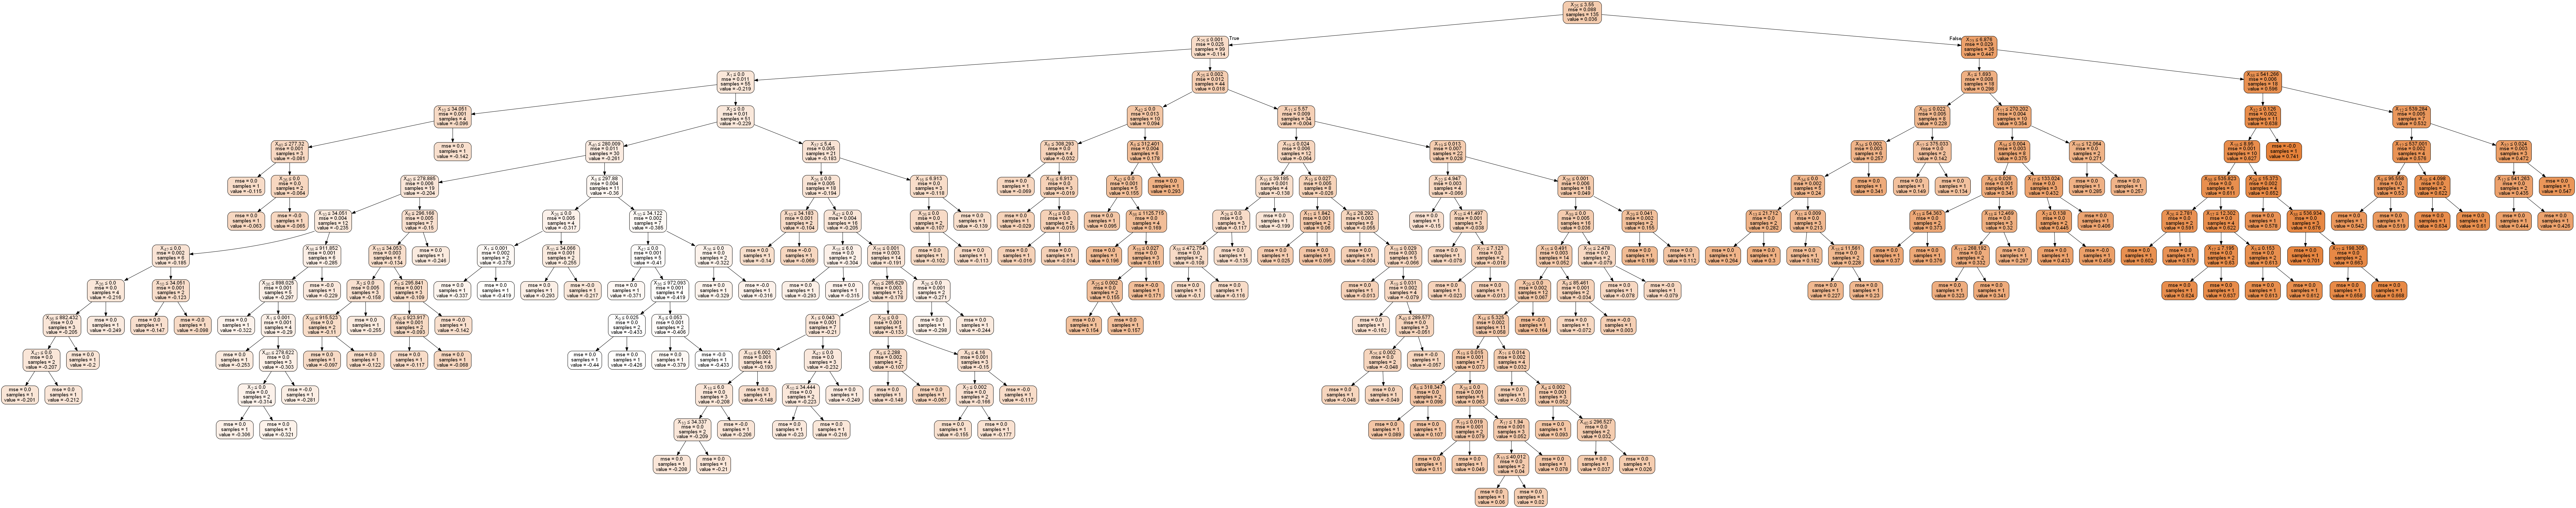

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())